# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1: Jason LaRuez
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

In [1]:
import numpy as np # For Gaussian sampling

def GaussianSampling(N,mu,std): # Input N a list containing integer sample sizes, mu the mean of the Gaussian dist, and std is standard dev. of the dist
    for n in N:
        n_sample = np.random.normal(loc = mu, scale = std, size = n) # Generate a Gaussian sample of size n with mean mu and standard deviation std
        M = [m for m in n_sample if (m > mu + std and m < mu + 2*std) or (m > mu - 2*std and m < mu - std)] # Select m from sample if they are between 1 and 2 stds
        print(len(M)/n) # Print the ratio of values which are between 1 and 2 standard deviations away from the mean (should approach 27.2%)
    
GaussianSampling([10,100,1000,10000,1000000],100,10)

0.3
0.24
0.283
0.2768
0.271306


Yes the fraction starts to approach 27.2% as we increase the number of samples

<font color='green'>Correct: 10 points</font> 

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution

Observe that these movie ratings are asymmetric attributes (most users have not see the vast majority of these 500 movies and as such will have a 0 as their "rating" value). To avoid making silly conclusions like "these two people both have 0 for the same 300 movies they must be very similar" we need to treat this assymetry. To do this we can convert the movie ratings for an individual person into a sort of basket data where we ommit all movies that the individual hasn't seen (has rating zero), and for each movie they have seen they will have an attribute whose value is equal to their 1-5 integer rating of the movie. Thus a data object will have as many attributes as movies the person has seen from the list, and these attributes will be discrete, qualitative and ordinal. With these 1000 baskets of movie ratings we can then apply association analysis to look for relationships occurring in and accross these baskets.

<font color='red'> Interesting ideas! </font>
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = 3000 binary attributes per user.
The resulting sparse data matrix would be 1000 rows x 3000 columns.

### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

1. True: Noise typically appears in the form of distortions to attribute values (such as measurement errors), or can appear in the form of an extraneous data object (duplicate data or a false data object for example)

2. False: Unless we are scientists specifically designing a method to be robust against noise and thus need noise to test the method, noise is never desirable. Cleaner data -> better data

3. True: An outlier is simply a data point which in some way is unusual (very far away from other data objects in the attribute space). If this data point represents a true observation of our system then we do not simply want to throw it away. Sometimes, as is the case in anomoly detection, we explicitly WANT these outliers. If the outlier is far away because of an error in data collection, we do not want it (say we have a dataset consisting of a group of people's information like height, weight and age. 80 years of age may be an outlier depending on the ages of the others in the group, but it's still a valid age so we still want it. But now say that the group we are collecting data on is an elementary school class of children; now a value of 80 years is undesirable since it is clearly false).

4. True (sometimes): Typically "noise" refers to measurement errors that add relatively small-moderate perturbations to attribute values. In these cases these noisy objects are not considered outliers. If the noise object has incorrect attribute values or is some sort of artifact object then it is possible for this object to be far from the other data objects in the attribute space and thus be considered an outlier.

5. True: As stated above, an outlier is simply a data point that is "far" away from most other data points. These can be true data points, such as if Jeff Bezos was included in a dataset of people and their networth. However these outliers may instead be far away due to incorrect data values, such as a human who is 800 years old and thus is a noisy data object.

<font color='green'> Correct: Liked the explanation : 5 points </font> 

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

| Variable | Categories |
| :- | :- |
| Index Counter | Discrete, qualitative and nominal |
| price | Discrete (integer \$ only), quantitative and ratio |
| carat | Continuous (takes decimal values), quantitative and ratio |
| cut | Discrete, qualitative, ordinal	||
| color | Discrete, qualitative, ordinal ||
| clarity | Discrete, qualitative, ordinal ||
| depth	| Continuous, quantitative, ratio||
| table	| Continuous, quantitative, ratio ||	
| x (length) | Continuous, quantitative and ratio ||
| y (width) | Continuous, quantitative and ratio ||
| z (depth) | Continuous, quantitative and ratio || 

<font color='green'> Correct: 5 points </font> 

#### Solution 4.2

In [5]:
## for data
import pandas as pd

diamond_data = pd.read_csv('diamonds.csv')
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color='green'> Correct : 2 points </font>

#### Solution 4.3

In [6]:
diamond_data.drop(columns = diamond_data.columns[0],inplace=True) #Drop id attribute to make computations cleaner
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [65]:
diamond_data.median()

carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

In [66]:
diamond_data.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


a) 

| Variable | Mean | Median | Standard Deviation | Range |
| :- | :- | :- | :- | :- |
| price | 2401 | 2401 | 3989.440 ~ 3989 | [326,18823] -> 18,497 |
| carat | 0.7 | 0.7 | 0.474 | [0.2,5.01] -> 4.81|
| depth	| 61.749 | 61 | 1.433 | [43,79] -> 36 |
| table	| 57 | 57 | 2.234 | [43,95] -> 52 |	
| x (length) | 5.7 | 5.7 | 1.122 | [0,10.74] -> 10.74 |
| y (width) | 5.71 | 5.71 | 1.142 | [0,58.9] -> 58.9 |
| z (depth) | 3.53 | 3.53 | 0.706 | [0,31.8] -> 31.8 |

b)

| Variable | Mode |
| :- | :- |
| cut | Ideal |
| color | G |
| clarity | Sl1 |

c) $IQR(price) = [950,5324]$ with a mean of 2401 (assumed to be in USD). 

<font color = 'green'>a. Partially correct: 0 points (Mean values are all incorrect except for Mean(depth) and Mean(x). 
                                                      You have troubles rounding off the values! Some values are totally incorrect. Please recheck!) </font>
<font color = 'green'>b. Correct: 1.5 points </font>
<font color = 'green'>c. Incorrect: 0 points </font>

#### Solution 4.4

In [74]:
diamond_data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

$$\frac{\text{# of very good or better}}{\text{# total}}=\frac{12082+13791+21551}{1610+4906+12082+13791+21551}=\frac{47,424}{53,940}\approx 0.8792$$

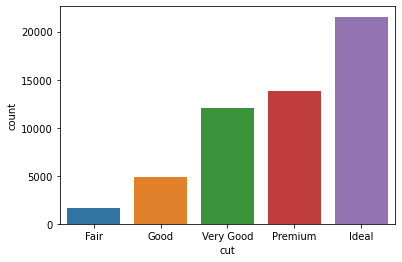

In [10]:
import seaborn as sns # For box plot

ax = sns.countplot(x="cut",data = diamond_data,order =["Fair","Good","Very Good","Premium","Ideal"])

<font color = 'green'> Correct: 5 points : Good solution </font> 

#### Solution 4.5

<AxesSubplot:>

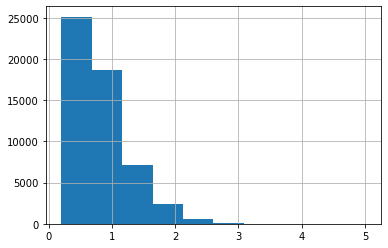

In [12]:
diamond_data['carat'].hist(bins=10) # Set number of bins appropriately

<font color = 'green'> Correct : 2 points </font> 
Consider plotting titles and axes names. That is always a good practice. 

#### Solution 4.6

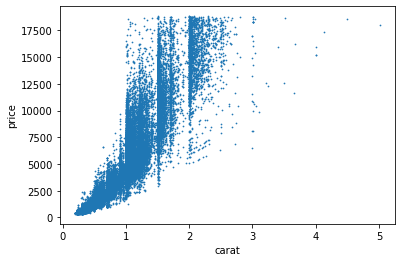

In [14]:
ax = diamond_data.plot.scatter(x='carat',y='price',s=0.5)

<font color = 'green'> Correct : 2 points </font> Again, plot title : Say "ScatterPlot of Price v/s Carat"

#### Solution 4.7

In [100]:
print("The correlation between carat and price is: ",diamond_data['carat'].corr(diamond_data['price']))

The correlation between carat and price is:  0.9215913011934779


In [98]:
Correlation(diamond_data['carat'],diamond_data['price']) # Verifying my correlation function from part 7

0.9215913011935698

<font color = 'green'> Correct : 1 point </font> Nice work! 

<font color = 'green'> Total : 18.5 / 20 </font> 

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

Since the length (number of words) of a document can vary drastically we want a measure which is invariant under length (scaling) so a good candidate (and the candidate often used) would be the cosine similarity between these vocabulary vectors, defined as the following:
$$cos(x,y) = \frac{<x,y>}{\|{x}\|\|y\|}=\frac{\sum_{i=1}^n tf_{i1}\cdot tf_{i2}}{\sqrt{\sum_{i=1}^n tf_{i1}}\cdot \sqrt{\sum_{i=1}^n tf_{i2}}}$$
where $j=1$ refers to document x and $j=2$ refers to document y.

<font color = 'red'> Partially Correct : 1 point </font> 
The denominator should have squared of tf_ij because you calculate magnitude which is square root of summation of square of each term

#### Solution 5.2

Consider the variable transformation:
$$idf_{ij}=tf_{ij}\cdot \log{\frac{m}{df_i}}$$
Observe that if $df_i = m$, (i.e. the ith term occurs in every document), then: 
$$\log{\frac{m}{df_i}}=\log{1}=0\rightarrow idf_{ij}=0$$
and $\log{\frac{m}{df_i}}$ is maximized when $df_i=1$ assuming $m>1$. All of this means that the transformation takes into account both the frequency of the word occurring, but also the commonality/rarity of the word across all documents being considered. As a result, very common words like "the", "a", "but", "it", "is", etc. are in a sense normalized. This prevents common words from dominating the similarity computation while allowing rarer words to be considered more importantly in the computation.

<font color='green'> Correct : 2 points </font>

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

In [20]:
def HammingDistance(x,y): # Input two binary vectors x, y (of equal length!), output Hamming distance between x and y.
    ham_dist = 0 # Initiate our counter (i.e. the hamming distance)
    for i in range(len(x)): # Iterate through our two binary vectors
        if x[i] != y[i]: # If the i-th elements of the two vectors differ, increase distance by 1
            ham_dist += 1
    return(ham_dist)

def SMC(x,y): # Input two binary vectors x, y (of equal length!), output simple matching coefficient (SMC) between x and y.
    smc_count = 0 # Initiate our counter for sum of matching values
    for i in range(len(x)): # Iterate through our two binary vectors
        if x[i] == y[i]: # If the i-th elements of the two vectors are the same, increase matching count by 1
            smc_count += 1
    return(smc_count/len(x))

def Jaccard(x,y): # Input two binary vectors x, y (of equal length!), output Jaccard similary coefficient between x and y.
    ii_count = 0 # Initiate our counters for matching 11 and 00 values
    oo_count = 0
    for i in range(len(x)): # Iterate through our two binary vectors
        if x[i] == y[i]: # If the i-th elements of the two vectors are the same, count if they are 11 or 00 matches
            if x[i] == 1:
                ii_count += 1
            else:
                oo_count += 1
    return(ii_count/(len(x)-oo_count)) # Return the number of 11 matches divided by the number of non-00 cases
    
x = [1,0,1,0,1,0,1,0,1,0,1,0,1]
y = [1,0,0,0,1,0,0,0,1,0,0,0,1]

print("The Hamming distance is:", HammingDistance(x,y))
print("The Simple Matching Coefficient is:", SMC(x,y))
print("The Jaccard Similarity Cofficient is:", Jaccard(x,y))

The Hamming distance is: 3
The Simple Matching Coefficient is: 0.7692307692307693
The Jaccard Similarity Cofficient is: 0.5714285714285714


<font color='green'> Correct : 6 points </font> 

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

In [23]:
import numpy as np # For simple math operations

def CosineSim(x,y): # Input two vectors (of equal length!) and output their cosine similarity
    inner_product = 0 # Initialize <x,y> ||x|| and ||y||
    x_norm, y_norm = 0,0
    for i in range(len(x)):
        inner_product += x[i]*y[i] # Compute sums required for <x,y> and the norms
        x_norm += x[i]*x[i]
        y_norm += y[i]*y[i]
    return inner_product/(np.sqrt(x_norm)*np.sqrt(y_norm)) # Return <x,y>/(||x||*||y||)

def Correlation(x,y): # Input two vectors (of equal length!) and output their Pearson Correlation Coefficient
    x_mean, y_mean = 0,0 # Initialize means
    for i in range(len(x)): # Compute sums
        x_mean += x[i] 
        y_mean += y[i]
    x_mean = x_mean/len(x) # Compute means
    y_mean = y_mean/len(x)
    sxy, sx, sy = 0,0,0 # Initialize s_xy, s_x and s_y
    for j in range(len(x)):
        sxy += (x[j] - x_mean)*(y[j] - y_mean) # Compute sums
        sx += np.power(x[j] - x_mean,2)
        sy += np.power(y[j] - y_mean,2)
    if sx == 0 or sy == 0: # If one vector std = 0 (all values are the same) then the correlation is undefined
        print("One or more variable has a standard deviation of zero, thus the correlation is not defined.")
        return ("Undefined")
    sxy = sxy/(len(x)-1) # Explicitly compute s_xy, s_x and s_y
    sx = np.sqrt(sx/(len(x)-1))
    sy = np.sqrt(sy/(len(y)-1))
    return (sxy/(sx*sy))

def Euclidean(x,y): # Input two vectors (of equal length) and return their Euclidean Distance
    sum = 0 # Initialize sum
    for i in range(len(x)):
        sum += np.power(x[i]-y[i],2) # Compute sum of squared differences
    return np.sqrt(sum) # Return Euclidean distance

def Jaccard(x,y): # Input two binary vectors x, y (of equal length!), output Jaccard similary coefficient between x and y.
    ii_count = 0 # Initiate our counters for matching 11 and 00 values
    oo_count = 0
    for i in range(len(x)): # Iterate through our two binary vectors
        if x[i] == y[i]: # If the i-th elements of the two vectors are the same, count if they are 11 or 00 matches
            if x[i] == 1:
                ii_count += 1
            else:
                oo_count += 1
    return(ii_count/(len(x)-oo_count)) # Return the number of 11 matches divided by the number of non-00 cases

def LmaxNorm(x,y): # Input two vectors (of the same length) and output their Lmax distance
    max_diff = 0 # Set max_diff to zero
    for i in range(len(x)):
        if abs(x[i] - y[i]) > max_diff:
            max_diff = abs(x[i] - y[i])
    return max_diff # Return the max difference between components of x and y, aka the Lmax distance

x = [1,1,1,1]
y = [3,3,3,3]
print("x = (1,1,1,1), y = (3,3,3,3)")
print("The Cosine similarity between x and y is: ",CosineSim(x,y))
print("The Pearson correlation between x and y is: ",Correlation(x,y))
print("The Euclidean distance between x and y is: ",Euclidean(x,y))

x = [0,1,0,1,0,1]
y = [1,0,1,0,1,0]

print("x = (0,1,0,1,0,1), y = (1,0,1,0,1,0)")
print("The Cosine similarity between x and y is: ",CosineSim(x,y))
print("The Pearson correlation between x and y is: ",Correlation(x,y))
print("The Euclidean distance between x and y is: ",Euclidean(x,y))
print("The Jaccard coefficient between x and y is: ",Jaccard(x,y))

x = [1,1,0,1,0,1]
y = [1,1,1,0,0,1]

print("x = (1,1,0,1,0,1), y = (1,1,1,0,0,1)")
print("The Cosine similarity between x and y is: ",CosineSim(x,y))
print("The Pearson correlation between x and y is: ",Correlation(x,y))
print("The Lmax distance between x and y is: ",LmaxNorm(x,y))
print("The Jaccard coefficient between x and y is: ",Jaccard(x,y))

x = (1,1,1,1), y = (3,3,3,3)
The Cosine similarity between x and y is:  1.0
One or more variable has a standard deviation of zero, thus the correlation is not defined.
The Pearson correlation between x and y is:  Undefined
The Euclidean distance between x and y is:  4.0
x = (0,1,0,1,0,1), y = (1,0,1,0,1,0)
The Cosine similarity between x and y is:  0.0
The Pearson correlation between x and y is:  -1.0000000000000002
The Euclidean distance between x and y is:  2.449489742783178
The Jaccard coefficient between x and y is:  0.0
x = (1,1,0,1,0,1), y = (1,1,1,0,0,1)
The Cosine similarity between x and y is:  0.75
The Pearson correlation between x and y is:  0.25
The Lmax distance between x and y is:  1
The Jaccard coefficient between x and y is:  0.6


<font color = 'green'> Correct: 6 points </font> 

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

<font color = 'green'> Total marks: 48.5 / 56 </font>